In [2]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout,Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD,Adam,rmsprop
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
print(tf.__version__)

2.1.0


In [4]:

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.applications import VGG16,InceptionV3,ResNet50V2
from keras.applications import imagenet_utils

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
def loadDataH5():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 


In [6]:
trainX, trainY, valX, valY = loadDataH5()

OSError: Unable to open file (unable to open file: name = 'data1.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
vgg_model = VGG16( include_top=False, weights='imagenet', input_tensor=None, input_shape=(128, 128,3), classes=17)
                    
                    
                    
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [8]:
# vgg_model = ResNet50V2(weights="imagenet", include_top=False, input_shape=trainX.shape[1:])
# vgg_model.summary()

In [8]:
# vgg_model = InceptionV3( include_top=False, weights='imagenet', input_tensor=None, input_shape=(128, 128,3), classes=17)
                    
                    
                    
# vgg_model.summary()

In [9]:
featuresTrain= vgg_model.predict(trainX)
featuresTrain= featuresTrain.reshape(featuresTrain.shape[0], -1)
featuresVal= vgg_model.predict(valX)
featuresVal= featuresVal.reshape(featuresVal.shape[0], -1)
featuresVal
# print (accuracy_score(featuresVal, valY))

array([[0.        , 0.        , 0.        , ..., 0.        , 0.71764886,
        0.        ],
       [0.05682029, 0.        , 0.        , ..., 0.        , 0.5494393 ,
        0.        ],
       [0.6453249 , 0.        , 0.3316909 , ..., 0.        , 1.384217  ,
        0.        ],
       ...,
       [0.3432715 , 0.        , 0.4406392 , ..., 0.        , 0.8401019 ,
        0.        ],
       [0.        , 0.        , 0.78052413, ..., 0.        , 0.70393276,
        0.        ],
       [0.80071056, 0.        , 0.7702394 , ..., 0.        , 0.61338323,
        0.        ]], dtype=float32)

# Random Forest 

In [7]:
model_RF = RandomForestClassifier(300)
model_RF.fit(featuresTrain, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
results_RF = model_RF.predict(featuresVal)
print (accuracy_score(results_RF, valY))

0.8235294117647058


In [10]:
print("\n Number of correctly identified imgaes: ",accuracy_score( results_RF,valY, normalize=False),"\n")
print("\n Confusion matrix : \n\n",confusion_matrix(valY, results_RF, labels=range(0,17)))


 Number of correctly identified imgaes:  280 


 Confusion matrix : 

 [[12  0  0  1  0  0  0  0  1  0  1  1  3  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  1  0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 2  2  0 11  1  1  0  0  0  0  0  0  1  0  0  2  0]
 [ 1  0  0  2 11  0  0  0  0  0  0  0  1  0  0  0  1]
 [ 0  0  0  3  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 19  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0 20  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0 20  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  1]
 [ 1  0  0  0  4  0  0  0  1  0  1  0 12  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 22  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  1  0 17  0  0]
 [ 2  0  0  1  0  3  0  0  0  0  0  0  2  0  1  6  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0 18]]


# Logistic Regression

In [11]:
model_LR= LogisticRegression()
model_LR.fit(featuresTrain, trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
results_LR = model_LR.predict(featuresVal)
print (accuracy_score(results_LR, valY))

0.8735294117647059


In [13]:
print("\n Number of correctly identified imgaes: ",accuracy_score( results_LR,valY, normalize=False),"\n")
print("\n Confusion matrix : \n\n",confusion_matrix(valY, results_LR, labels=range(0,17)))


 Number of correctly identified imgaes:  297 


 Confusion matrix : 

 [[15  0  0  1  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  0  0  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  1  0 14  1  1  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 16  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 20  1  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  1]
 [ 2  0  0  0  2  0  0  0  0  0  1  0 14  0  1  0  0]
 [ 0  1  0  0  0  0  0  1  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 3  0  0  1  0  0  0  0  0  0  0  0  2  0  0  9  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0 18]]


# Linear SVC

In [14]:
model_SVM= LinearSVC()
model_SVM.fit(featuresTrain, trainY)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:

results_SVM = model_SVM.predict(featuresVal)

print (accuracy_score(results_SVM, valY))

0.8794117647058823


In [16]:
print("\n Number of correctly identified imgaes: ",accuracy_score( results_SVM,valY, normalize=False),"\n")
print("\n Confusion matrix : \n\n",confusion_matrix(valY, results_SVM, labels=range(0,17)))


 Number of correctly identified imgaes:  299 


 Confusion matrix : 

 [[15  0  0  1  0  0  0  0  0  0  0  1  2  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  0  0  0  0  2  1  0  0  0  0  0  0  0  0]
 [ 1  1  0 15  0  1  0  0  1  0  0  0  0  0  0  1  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0 16  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  1  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0 20  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 20  1  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 1  0  0  0  1  0  0  0  0  0  0 19  0  0  0  0  2]
 [ 2  0  0  0  1  0  0  0  0  0  0  0 16  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  2  0  1  9  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0 18]]


## KNeighborsClassifier  

In [17]:
model_KNN = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

model_KNN.fit(featuresTrain, trainY)

results_KNN =model_KNN.predict(featuresVal)

print (accuracy_score(results_KNN, valY))

print("\n Number of correctly identified imgaes: ",accuracy_score( results_KNN,valY, normalize=False),"\n")
print("\n Confusion matrix : \n\n",confusion_matrix(valY, results_KNN, labels=range(0,17)))

0.6705882352941176

 Number of correctly identified imgaes:  228 


 Confusion matrix : 

 [[15  0  0  2  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 11  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 2  1  0 16  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  3  2  0  0  0  0  1  0  3  2  0  0  0  2]
 [ 0  0  0  3  0 12  0  0  0  0  0  2  0  0  0  0  1]
 [ 0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  1  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 22  0  1  2  1  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 5  1  0  4  1  0  0  0  0  1 10  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  1]
 [ 5  0  0  4  1  0  0  0  0  0  2  2  4  0  0  0  2]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0 21  0  0  1]
 [ 3  2  0  2  1  2  0  1  0  1  1  0  0  0  5  1  0]
 [ 4  0  0  4  1  1  0  0  0  0  0  2  0  0  0  3  0]
 [ 0  1  0  1  0  0  0  0  0  0  0  1  0  0  

In [ ]:


# classifiers = {
# #     "LogisiticRegression": LogisticRegression(solver = "lbfgs"),
#     "KNearest": KNeighborsClassifier(n_neighbors=2)
# #     "Support Vector Classifier": SVC(gamma = 'scale'),
# #     "DecisionTreeClassifier": DecisionTreeClassifier(),
# #     "Random Forest":RandomForestClassifier(n_estimators=1600),
# #     "xGBClassifier":XGBClassifier(),
# #     "GradientBoostedClassifier": GradientBoostingClassifier()
# }

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


# for key, classifier in classifiers.items():
#     classifier.fit(featuresTrain, trainY)
#     y_pred=classifier.predict(featuresVal)
#     training_score = cross_val_score(classifier, featuresTrain, trainY, cv=5)
#     print("Classifiers: ", classifier.__class__.__name__, " accuracy score")
# #     print('---' * 45)
#     print('-' * 45 + "Test Performance"+"-"*45)
#     print('Accuracy Score: {:.2f} \n'.format(accuracy_score(valY, y_pred)))
#     print("\n Number of correctly identified imgaes: ",accuracy_score( y_pred,valY, normalize=False),"\n")
#     print("\n Confusion matrix : \n\n",confusion_matrix(valY, y_pred, labels=range(0,17)))
# #     print('---' * 45)


# PART B-II

# Freezing all the layers and adding a new fully connected layer


In [10]:
def plotting_models(history,model_name):
    # Train and Validation Loss/Acc plots
    plt.style.use('ggplot')
    plt.figure()
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['loss'], label="train_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_loss'], label="val_loss")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['accuracy'], label="train_acc")
    plt.plot(np.arange(0, NUM_EPOCHS), history.history['val_accuracy'], label="val_acc")
    plt.title("Train/Val: loss and accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig(model_name+"_loss_acc_curves.png")

In [11]:
vgg_model.trainable = False

model = Sequential()
model.add(vgg_model)
model.add(Flatten())
# model.summary()
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(17, activation='softmax'))

In [12]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [13]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])  

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,True
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,True
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,True
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,True
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,True
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,True
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,True
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,True
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,True


In [22]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [24]:
history = model.fit(x=trainX, y=trainY,
                            batch_size=32,
                            epochs=30,
                            validation_data=(valX, valY))

Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 98s 97ms/step - loss: 2.8033 - accuracy: 0.0882 - val_loss: 2.5011 - val_accuracy: 0.1824
Epoch 2/30
1020/1020 [==============================] - 107s 105ms/step - loss: 2.4823 - accuracy: 0.2255 - val_loss: 2.1056 - val_accuracy: 0.4500
Epoch 3/30
1020/1020 [==============================] - 106s 104ms/step - loss: 2.1834 - accuracy: 0.3196 - val_loss: 1.8033 - val_accuracy: 0.4912
Epoch 4/30
1020/1020 [==============================] - 107s 105ms/step - loss: 1.9301 - accuracy: 0.4029 - val_loss: 1.5218 - val_accuracy: 0.6029
Epoch 5/30
1020/1020 [==============================] - 103s 101ms/step - loss: 1.7221 - accuracy: 0.4735 - val_loss: 1.2845 - val_accuracy: 0.7000
Epoch 6/30
1020/1020 [==============================] - 100s 98ms/step - loss: 1.5354 - accuracy: 0.5235 - val_loss: 1.2378 - val_accuracy: 0.6500
Epoch 7/30
1020/1020 [==============================] - 113s 111ms/s

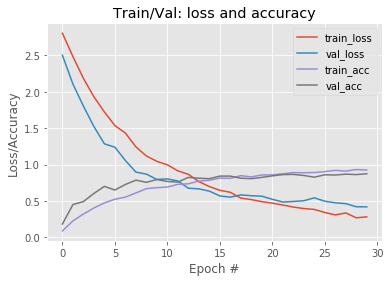

In [29]:
NUM_EPOCHS=30
plotting_models(history,model_name="VGG16 Shallow freezed")

# Tuning the model by unfreezing block5_conv1 layers

In [23]:
vgg_model.trainable = True
set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block4_conv1']:
            set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [24]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [25]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


In [28]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(17, activation='softmax'))

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.01),
              metrics=['accuracy'])

In [30]:
trainX, trainY, valX, valY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [31]:
history = model.fit(x=trainX, y=trainY,
                            batch_size=32,
                            epochs=30,
                            validation_data=(valX, valY))

Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 198s 194ms/step - loss: 773375.6214 - accuracy: 0.0549 - val_loss: 3.0563 - val_accuracy: 0.0588
Epoch 2/30
1020/1020 [==============================] - 198s 194ms/step - loss: 3.7693 - accuracy: 0.0588 - val_loss: 2.8356 - val_accuracy: 0.0618
Epoch 3/30
1020/1020 [==============================] - 193s 189ms/step - loss: 3.0233 - accuracy: 0.0578 - val_loss: 2.8379 - val_accuracy: 0.0618
Epoch 4/30
1020/1020 [==============================] - 194s 191ms/step - loss: 2.8795 - accuracy: 0.0510 - val_loss: 2.8389 - val_accuracy: 0.0441
Epoch 5/30
1020/1020 [==============================] - 196s 192ms/step - loss: 2.9238 - accuracy: 0.0529 - val_loss: 2.8389 - val_accuracy: 0.0441
Epoch 6/30
1020/1020 [==============================] - 200s 196ms/step - loss: 2.8457 - accuracy: 0.0637 - val_loss: 2.8392 - val_accuracy: 0.0441
Epoch 7/30
1020/1020 [==============================] - 188s

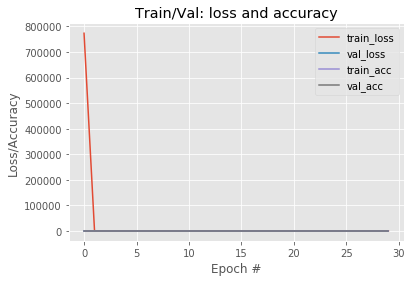

In [32]:
NUM_EPOCHS=30
plotting_models(history,model_name="Vgg16_Unfreezed_block4_Adam_lr001")

## Tuning the model by unfreezing block4_conv1 layers